In [ ]:
!pip install yfinance mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


/tmp/ipython-input-12-4294607003.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2024-01-01", end="2024-12-31", group_by='ticker')
[*********************100%***********************]  1 of 1 completed


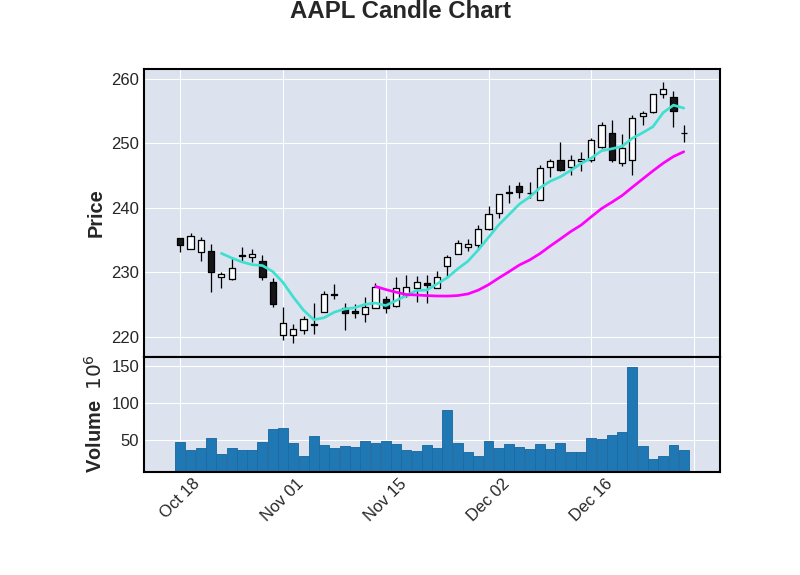

In [ ]:
# 0. Colab 셀 최상단에만 한 번 실행
!pip install --upgrade pip
!pip install --no-cache-dir yfinance mplfinance pandas

# 1. 라이브러리 임포트
import yfinance as yf
import mplfinance as mpf
import pandas as pd
from IPython.display import Image

# 2. yfinance로 데이터 받아오기 (group_by='ticker' 로 명시)
df = yf.download("AAPL", start="2024-01-01", end="2024-12-31", group_by='ticker')

# 3. MultiIndex 풀기 → 'AAPL' 아래 가격 정보만 취득
df = df["AAPL"]

# 4. 다섯 개 칼럼만 선택
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 5. 숫자형 보장 + NaN 제거
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# 6. 마지막 50일치 캔들차트 생성
mpf.plot(
    df[-50:],
    type='candle',
    mav=(5, 20),
    volume=True,
    title='AAPL Candle Chart',
    savefig='aapl_chart.png'
)

# 7. Colab에 이미지 표시
Image('aapl_chart.png')
